# Same process -- 

> Load the data -> split it -> proprocessing -> model -> Confusion Metrix -> Graph

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[ : , : -1].values
Y = dataset.iloc[ : , -1].values

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( n_estimators=100 , criterion='entropy' , random_state=0) # build the model
classifier.fit(X_train , Y_train)

RandomForestClassifier(criterion='log_loss', random_state=0)

### Checking the Results

In [76]:
print(classifier.predict(sc.transform([[30,87000]]))) 
X_predict = classifier.predict(X_test)
print(X_predict)

[0]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [77]:
# Set print precision
np.set_printoptions(precision=2)

# Make sure both are 2D arrays with the same number of rows
# Reshape if necessary
Y_test = Y_test.reshape(-1, 1)
X_predict = X_predict.reshape(-1, 1)

# Concatenate along columns (axis=1)
results = np.concatenate((Y_test, X_predict), axis=1)

# Print results
print(results)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [78]:
from sklearn.metrics import confusion_matrix ,accuracy_score
cm = confusion_matrix(Y_test , X_predict) 
print(cm)
accuracy_score(Y_test , X_predict) #this will give the number 

[[63  5]
 [ 4 28]]


0.91

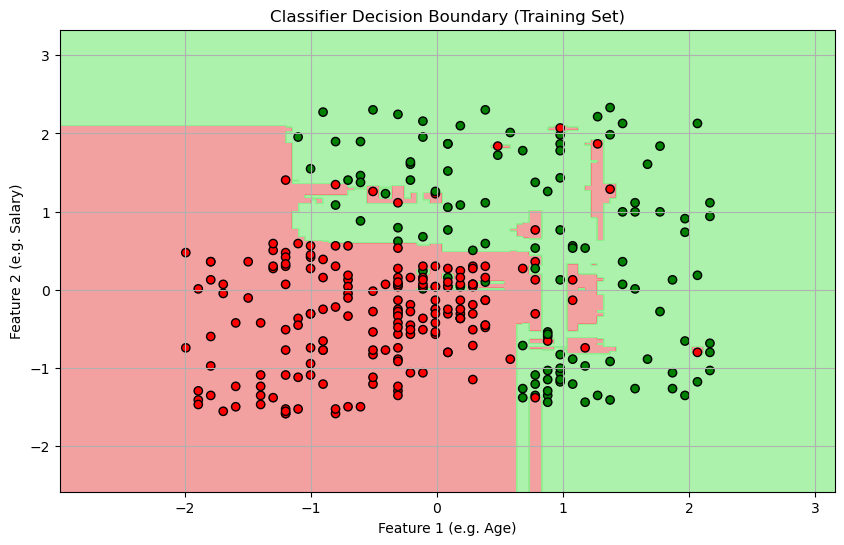

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assume you already have: X_train, Y_train, classifier

# Create meshgrid
X_set, y_set = X_train, Y_train.ravel()
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('lightcoral', 'lightgreen')))

# Plot training points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolor='k')

plt.title('Classifier Decision Boundary (Training Set)')
plt.xlabel('Feature 1 (e.g. Age)')
plt.ylabel('Feature 2 (e.g. Salary)')
plt.grid(True)
plt.show()


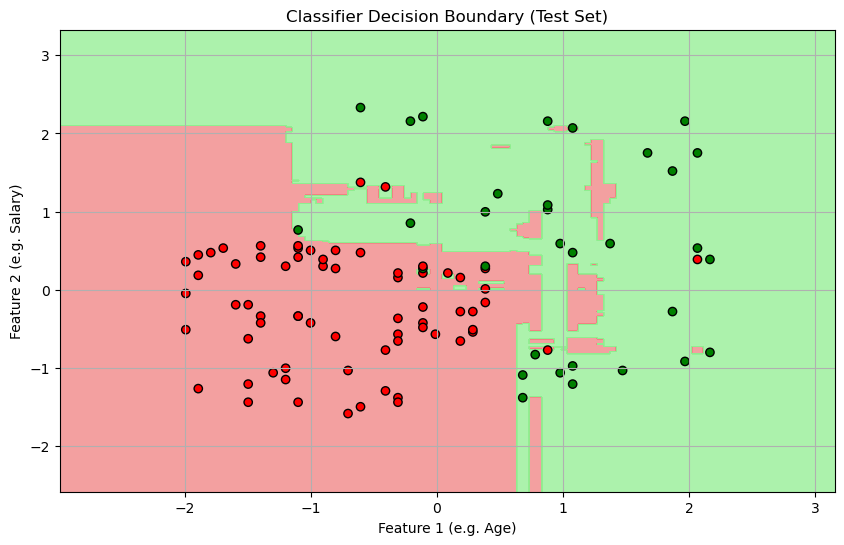

In [80]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assume you already have: X_train, Y_train, classifier

# Create meshgrid
X_set, y_set = X_test, Y_test.ravel()
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('lightcoral', 'lightgreen')))

# Plot training points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolor='k')

plt.title('Classifier Decision Boundary (Test Set)')
plt.xlabel('Feature 1 (e.g. Age)')
plt.ylabel('Feature 2 (e.g. Salary)')
plt.grid(True)
plt.show()
